# **Data Mining Term Project**











**Goal Of the Project:**
The Aim of the project is to  Build a machine learning model and deploy it on the live url which predicts the numerical rating of a game review.

In [85]:
%%html
<h3 style=font-weight:bold;font-size:20px;>The Dataset and the Classifiers Used </h3>
<h3 style=font-weight:bold;font-size:15px;>For this project I have used the Board Game geek review dataset from the kaggle:</h3> https://www.kaggle.com/jvanelteren/boardgamegeek-reviews
<h3 style=font-weight:bold;font-size:15px;>The dataset has a total of 16 million reviews and the datset consists of the review and the corresponding rating given by the user for 
  the game. For training the model I have used Multinomail Naive Bayes, KNN, Ridge classifier,Logistic Regression, methods and evaluated the performance of the each model using confusion matrix, Which is very
  good for the predictions. I have also performed exploratory data analysis for the dataset and used customized preprocessing technique to remove stop words and punctuation. Used the count libraaries from nltk to obtain the 
  Tf-Idf matrix for the words. And I have Used seaborn for the DataVisualization.
  </h3>


In [28]:
%%html
<p style=background-color:#6aa2de;font-weight:bold;font-size:15px;text-align:center;>Importing the Required libraries</p>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
%%html
<h3 style=font-weight:bold;font-size:15px;>As the DataSet is huge I have used Google colab as colab has good computing power and mounted the dataset to the google drive </h3>

In [32]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
bggdf=pd.read_csv('/content/gdrive/My Drive/bgg-15m-reviews.csv')

In [34]:
bggdf.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,Torsten,10.0,NaN,30549,Pandemic
1,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
2,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
3,3,Mike Mayer,10.0,NaN,30549,Pandemic
4,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic


In [35]:
len(bggdf)

15823269

In [36]:
numof_null=len(bggdf[bggdf['comment'].isnull()])

In [37]:
print('The Number of Null Values in the dataset is {}'.format(numof_null))

The Number of Null Values in the dataset is 12828246


There are lot of Null Values In Comments and they have to be removed from the dataset

In [38]:
bggdf.dropna(inplace=True)

In [ ]:
print('The size of the dataset after removing null values is {}'.format(len(bggdf)))

The size of the dataset after removing null values is 2995023


# Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Ratings')

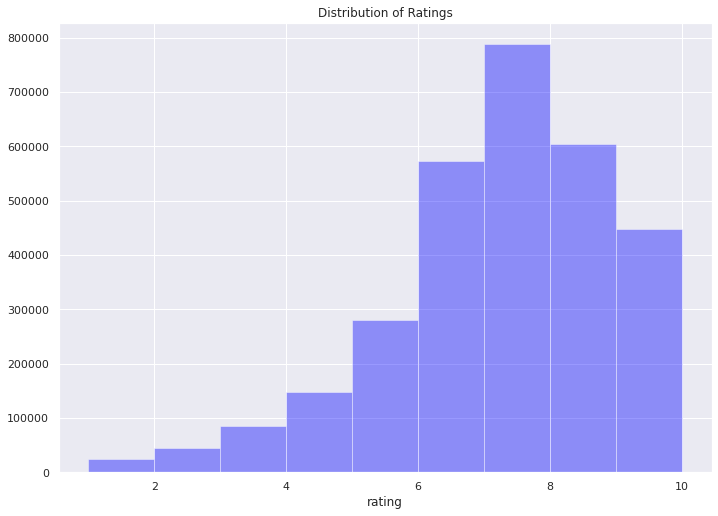

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bggdf['rating'],bins=[1,2,3,4,5,6,7,8,9,10],kde=False,color='blue').set_title('Distribution of Ratings')

**From the above visualization we can see that the most of the ratings are in range 6 to 8**

In [ ]:
print('The total number of Unique Games in the dataset={}'.format(len(bggdf['name'].unique())))

The total number of Unique Games in the dataset=18978


In [ ]:
top10=bggdf.groupby(['name']).mean()['rating'].nlargest(n=10,keep='last')
print('The top 10 games with highest average rating :\n\n {}'.format(top10))

The top 10 games with highest average rating :

 name
Dice Throne: Season One ReRolled             10.000000
TerroriXico                                   9.926829
Far Away                                      9.714286
Moonshine Empire                              9.700000
Frontier: The Card Game                       9.692308
Aeolis                                        9.692308
Dungeon Crusade: Book I – Genesis of Evil     9.666667
Jack's Friends                                9.625000
Gunfights & Gamblin'                          9.578947
Blood & Plunder                               9.564516
Name: rating, dtype: float64


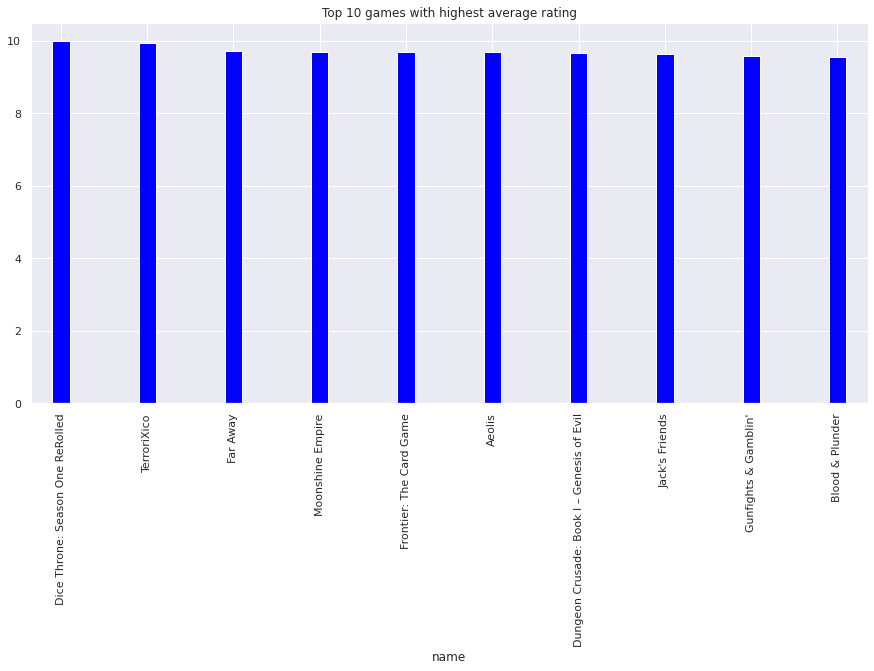

In [ ]:
v=bggdf.groupby(['name']).mean()['rating'].nlargest(n=10,keep='last')

v.plot(title='Top 10 games with highest average rating',kind='bar',color='blue',figsize=(15,7),label=True,width=0.2)

**Experimenting with length of the comments to check if there is any relation between the length of the comments and the Rating**

In [ ]:
bggdf['length']=bggdf['comment'].apply(len)

In [ ]:
bggdf.head()

,Unnamed: 0,user,rating,comment,ID,name,length
1,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic,429
2,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic,406
4,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic,316
5,5,cfarrell,10.0,Hey! I can finally rate this game I've been pl...,30549,Pandemic,1235
8,8,gregd,10.0,Love it- great fun with my son. 2 plays so far...,30549,Pandemic,75


**From the above table we see that an extra column length has been added to the dataframe.**

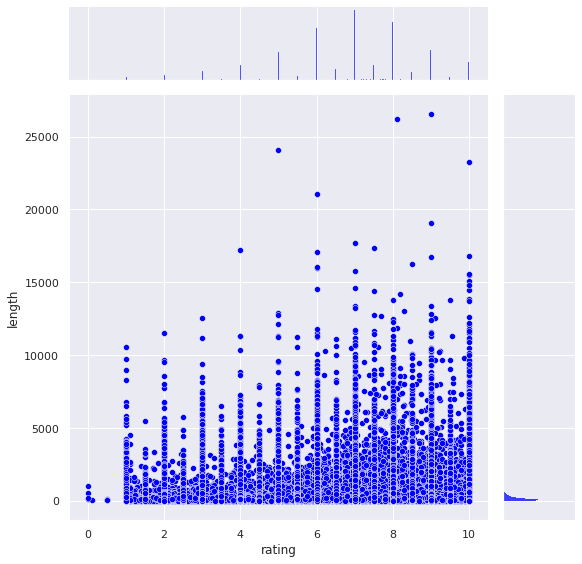

In [ ]:
sns.set(rc={'figure.figsize':(20.7,17.27)})
sns.jointplot(x='rating',y='length',data=bggdf,color='blue',height=8)
#sns.catplot(x="rating", y="length", data=bggdf)

**From the above graph we could say that as the rating increases from 0 to 10  the length of the comment is also increasing, So length of the comment might also be an important feature in predicting the rating.**

# Data preprocessing

**We need to shuffle the data before we can take the chunk out of it as the training data should consists of all the ratings from 1-10**

In [39]:
bggdf = bggdf.sample(frac = 1)

In [40]:

import string
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**The stopwords needs to be downloaded from the nltk package to remove them from the dataset**

In [42]:
bggdf.reset_index(inplace = True, drop = True) 

**We need to round of the values for the rating as our goal is to predict the integer ratings from 1 to 10. eg: rounding: 5.7 to 6**

In [43]:
bggdf['rating'] =np.round(bggdf['rating'])

In [44]:
bggdf.head()

,Unnamed: 0,user,rating,comment,ID,name
0,4329551,gobo1572,8.0,Finally 'get' this game after many failed atte...,8217,San Juan
1,10795898,menes1964,8.0,a great game.,214,Café International
2,11766473,pwinckles,5.0,"Similar to the Indulgence, Dragonmaster, Coup ...",85250,The Dwarf King
3,1740457,bkjohns1,7.0,"Includes fan made role cards, additional board...",65244,Forbidden Island
4,11615099,Mikaeljp,9.0,I've only played this game solo and will proba...,224821,One Deck Dungeon: Forest of Shadows


**I am experiencing the significant consumption of RAM and the session was crashing, so I have taken the part of the dataset**

In [45]:
sample_bggdf=bggdf[:25000]

In [46]:
len(sample_bggdf)

25000

**The stopwords have to be removed from the comments as stop words do not have any meaning in the sentence, I have used the customized preprocessing function to remove stopwords and removed any extra punctuation in the comments column and converted the words to the lowercase.**

In [47]:
ps=PorterStemmer()
def rem_punc_stopwords(mes):
    wordlist=[]
    for word in mes:
        if word not in string.punctuation:
            wordlist.append(word)
    wordlist=''.join(wordlist)
    finalwordlist=[]
    for word in wordlist.split():
        if word.lower() not in stopwords.words('english'):
            finalwordlist.append(word.lower())
    return ' '.join(finalwordlist)
    
        
        



    

**Applying the above defined function to the comment column of the dataset.**

In [48]:
sample_bggdf['comment']=sample_bggdf['comment'].apply(rem_punc_stopwords)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**The comment column after removing the stopwords and the punctuation from them.**

In [49]:
sample_bggdf.head()

,Unnamed: 0,user,rating,comment,ID,name
0,4329551,gobo1572,8.0,finally get game many failed attempts play gre...,8217,San Juan
1,10795898,menes1964,8.0,great game,214,Café International
2,11766473,pwinckles,5.0,similar indulgence dragonmaster coup détat lin...,85250,The Dwarf King
3,1740457,bkjohns1,7.0,includes fan made role cards additional board ...,65244,Forbidden Island
4,11615099,Mikaeljp,9.0,ive played game solo probably mostly play way ...,224821,One Deck Dungeon: Forest of Shadows


**This is the most important part in the project, the sentences have to be convereted into a vector the TfidfVectorizer method comes in handy. The method follows the below formula and creates  a huge sparse matrix. The sparse matrix has the sentences as rows and the words as the columns, the values consists of the number of times the word occured in the comment and multiplied by the number of documents the word has occured.**
**This check basically two things:**
**importance of the word in the comment and importance of the word in total corpus**

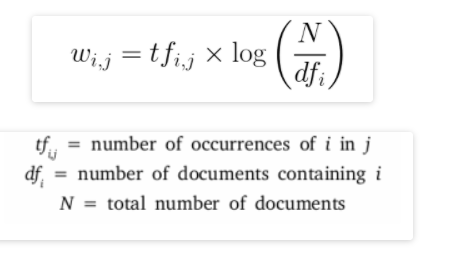

Importing TF-IDF vectorizer.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
# cv=CountVectorizer(max_features=4000).fit_transform(bggdf['comment'])
# tfidf_trans=TfidfTransformer(smooth_idf=True,use_idf=True) 
# x=tfidf_trans.fit(cv)
# x=x[:].T.todense()
# #x=cv
# from sklearn.feature_extraction.text import TfidfVectorizer


tf_vect = TfidfVectorizer(max_features=10000)
tfidf_vect= tf_vect.fit_transform(sample_bggdf['comment'])
tfidf_vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
y=sample_bggdf['rating'].values

# **Multinomial Naive Bayes**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [54]:
x_train,x_test,y_train,y_test=train_test_split(tfidf_vect,y,test_size=0.30)

In [55]:
y_train=y_train.astype('int')

In [56]:
multinaive_bayes=MultinomialNB()
multinaive_bayes.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
ynaive_pred=multinaive_bayes.predict(x_test)

In [58]:
print(y_test,ynaive_pred)

[ 7.  8. 10. ...  7.  6.  9.] [7 8 8 ... 8 8 8]


In [59]:
y_test=y_test.astype('int')

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy_naivebayes=accuracy_score(y_test,ynaive_pred)
accuracy_naivebayes

0.28746666666666665

Text(114.0, 0.5, 'Predicted Rating')

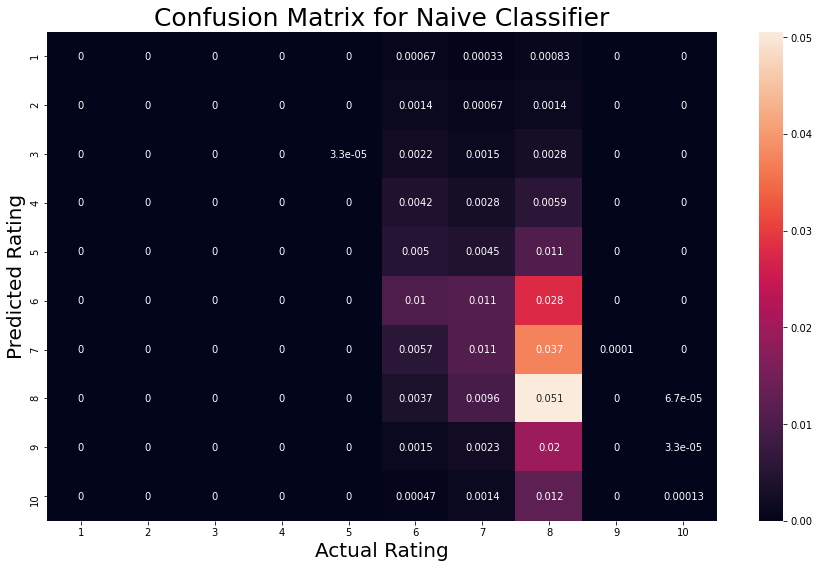

In [62]:
cm=confusion_matrix(y_test,ynaive_pred)
fig, ax = plt.subplots(figsize=(15,9)) 
sns.heatmap(cm/30000,xticklabels=[1,2,3,4,5,6,7,8,9,10],yticklabels=[1,2,3,4,5,6,7,8,9,10],annot=True,ax=ax)

plt.title('Confusion Matrix for Naive Classifier', fontsize = 25) 
plt.xlabel('Actual Rating', fontsize = 20) 
plt.ylabel('Predicted Rating', fontsize = 20) 

In [63]:
from sklearn.metrics import accuracy_score
accuracy_naivebayes=accuracy_score(y_test,ynaive_pred)
print('The accuracy score for the Multinomial Naive Bayes is {}'.format(accuracy_naivebayes*100))

The accuracy score for the Multinomial Naive Bayes is 28.746666666666666


# **Ridge Classifier**

In [64]:
from sklearn.linear_model import LogisticRegression,Ridge,RidgeClassifier

In [65]:
ridge_model=RidgeClassifier()
ridge_model.fit(x_train,y_train)
y_pred=ridge_model.predict(x_test)

Text(114.0, 0.5, 'Predicted Rating')

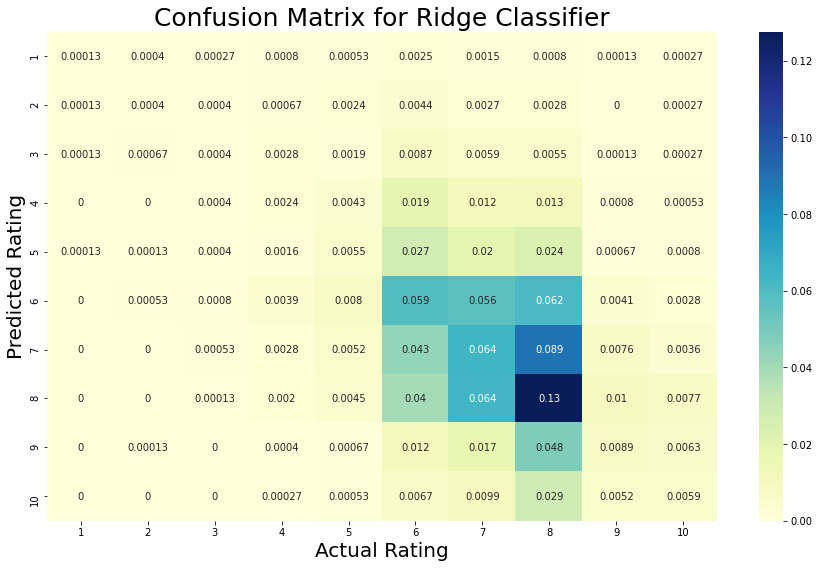

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(15,9)) 
sns.heatmap(cm/len(y_test),xticklabels=[1,2,3,4,5,6,7,8,9,10],yticklabels=[1,2,3,4,5,6,7,8,9,10],annot=True,cmap='YlGnBu',ax=ax)

plt.title('Confusion Matrix for Ridge Classifier', fontsize = 25) 
plt.xlabel('Actual Rating', fontsize = 20) 
plt.ylabel('Predicted Rating', fontsize = 20) 

In [67]:
from sklearn.metrics import accuracy_score
accuracy_ridge=accuracy_score(y_test,y_pred)
print('The accuracy score for the Rdige classifier is {}'.format(accuracy_ridge*100))

The accuracy score for the Rdige classifier is 27.426666666666666


In [69]:
inputtext='This is an amazing game'


vector= tf_vect.transform([inputtext])
y_pred=ridge_model.predict(vector)
y_pred

array([10])

# **Logistic Regression**

In [71]:
logistic_model=LogisticRegression(max_iter=10000)
logistic_model.fit(x_train[:10000],y_train[:10000])
ylogistic_pred=logistic_model.predict(x_test[:2000])

Text(114.0, 0.5, 'Predicted Rating')

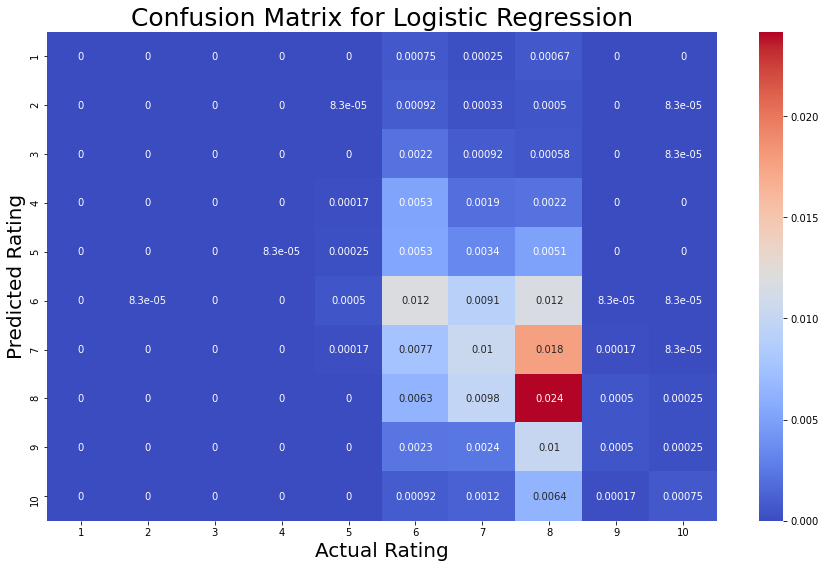

In [74]:
cm=confusion_matrix(y_test[:2000],ylogistic_pred)
fig, ax = plt.subplots(figsize=(15,9)) 
sns.heatmap(cm/(12000),xticklabels=[1,2,3,4,5,6,7,8,9,10],yticklabels=[1,2,3,4,5,6,7,8,9,10],annot=True,cmap='coolwarm',ax=ax)

plt.title('Confusion Matrix for Logistic Regression', fontsize = 25) 
plt.xlabel('Actual Rating', fontsize = 20) 
plt.ylabel('Predicted Rating', fontsize = 20) 

In [75]:
from sklearn.metrics import accuracy_score
accuracy_logistic=accuracy_score(y_test[:2000],ylogistic_pred)
print('The accuracy score for the logistic Regression classifier is {}'.format(accuracy_logistic*100))

The accuracy score for the logistic Regression classifier is 28.749999999999996


# KNN Cassifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn_model=KNeighborsClassifier(n_neighbors=30,metric='cosine')
knn_model.fit(x_train[:10000],y_train[:10000])
yknn_pred=knn_model.predict(x_test[:2000])


Text(114.0, 0.5, 'Predicted Rating')

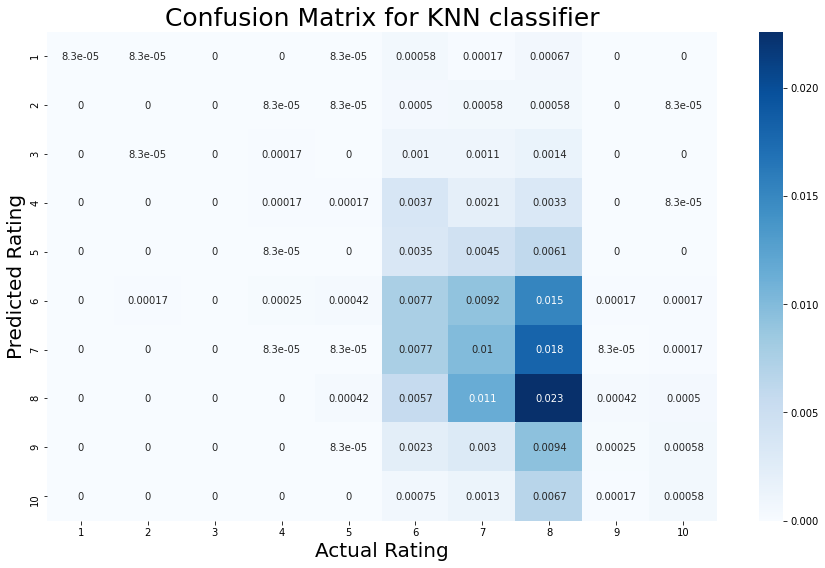

In [84]:
cm=confusion_matrix(y_test[:2000],yknn_pred)
fig, ax = plt.subplots(figsize=(15,9)) 
sns.heatmap(cm/(12000),xticklabels=[1,2,3,4,5,6,7,8,9,10],yticklabels=[1,2,3,4,5,6,7,8,9,10],annot=True,cmap='Blues',ax=ax)

plt.title('Confusion Matrix for KNN classifier', fontsize = 25) 
plt.xlabel('Actual Rating', fontsize = 20) 
plt.ylabel('Predicted Rating', fontsize = 20) 

In [79]:
from sklearn.metrics import accuracy_score
accuracy_knn=accuracy_score(y_test[:2000],yknn_pred)
print('The accuracy score for the Knn classifier is {}'.format(accuracy_knn*100))

The accuracy score for the Knn classifier is 24.8


# Ensemble Method

In [80]:
from sklearn.ensemble import VotingClassifier
Ensemble = VotingClassifier(estimators=[('KNN',knn_model),('logistic',logistic_model)],voting='soft',weights=[1,2])
ensemble_model = Ensemble.fit(x_train[:30000],y_train[:30000])
yensemble_pred = ensemble_model.predict(x_test[:5000])


Text(114.0, 0.5, 'Predicted Rating')

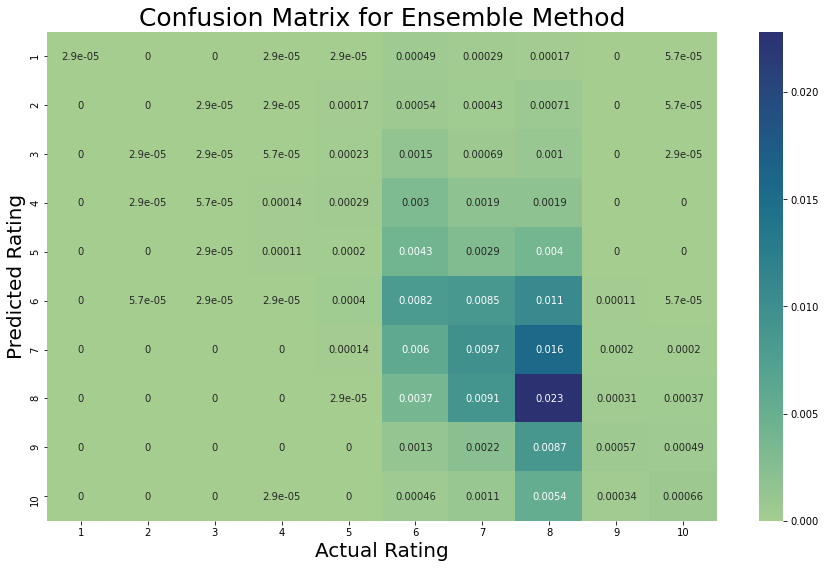

In [81]:
cm=confusion_matrix(y_test[:5000],yensemble_pred)
fig, ax = plt.subplots(figsize=(15,9)) 
sns.heatmap(cm/(35000),xticklabels=[1,2,3,4,5,6,7,8,9,10],yticklabels=[1,2,3,4,5,6,7,8,9,10],annot=True,cmap='crest',ax=ax)

plt.title('Confusion Matrix for Ensemble Method', fontsize = 25) 
plt.xlabel('Actual Rating', fontsize = 20) 
plt.ylabel('Predicted Rating', fontsize = 20) 

In [83]:
from sklearn.metrics import accuracy_score
accuracy_ensemble=accuracy_score(y_test[:5000],yensemble_pred)
print('The accuracy score for the Knn classifier is {}'.format(accuracy_ensemble*100))

The accuracy score for the Knn classifier is 29.62


# **Evaluation of Classifiers**


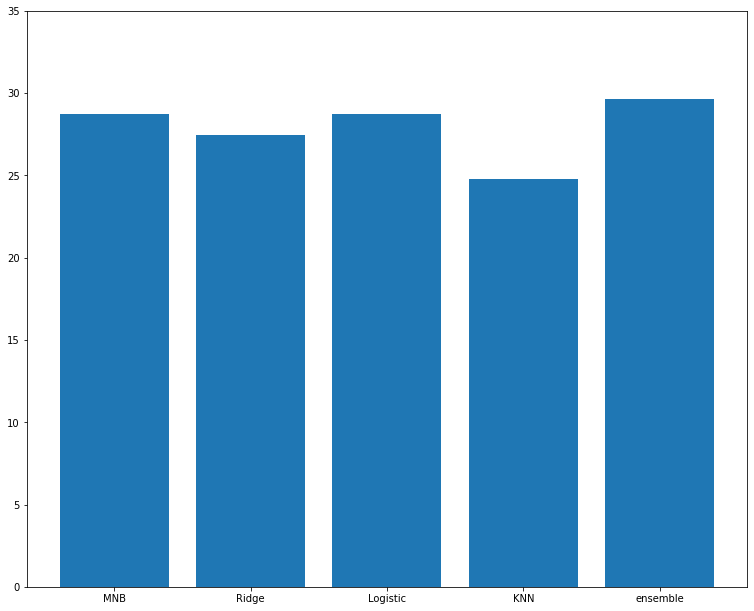

In [90]:
fig = plt.figure(figsize=(10,8))
labels = ['MNB','Ridge','Logistic','KNN','ensemble']
xvalues=[accuracy_naivebayes*100,accuracy_ridge*100,accuracy_logistic*100,accuracy_knn*100,accuracy_ensemble*100]
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(labels,xvalues)
plt.ylim(0,35)
plt.show()

# **Challenges faced:**


> Indented block



* The main challenge that I have faced is with the size of the dataset, even the googlecolab RAM of 12 GB is not sufficient for the data and sessions kept on crashing, I have experimented with the different sizes of the data, But If we had a better computational power, I could have got much more better results as I could not utilise all of the dataset.

*   Removing stopwords from the data was also a time consuming as it has to iterate over the data for the length times and each word.

*  The Hyperparameters such as max_features in the tfidfVextorizer() function and k value in KNN took lot of time for tuning especially max_features as it gave different accuracy values for the different max_feature value.

*   The Deployement also a considerable amount of time as I faced issue with the CSS in my code.









# **Contributions Made**
> Indented block

*   https://www.youtube.com/watch?v=RZYjsw6P4nI&t=433s   
*   I have watched the above tutorial in order to get the idea of the prediction using Naive Bayes algorithms. In this as the data set size is less the guy in the above tutorial used CountVectorizer() which uses Bag of Words algorithm. But as our dataset is huge I used the TFIDFVectorizer which considers the importance of the words in sentence as well as importance of the word in whole dataset.
*   In addition to the above algorithm which I have done using Multinomial Naive Bayes, I have alos experimented with the Ridge, KNN, Logistic.
*  The main thing which have done, is I have used ensemble method for the which it uses soft Voting method I have done it with two classifiers with a mix of KNN and Logistic.
*   Eventhough the Multinomial Naive Bayes is showing more accuracy, looking at the confusion matrix the Naive Bayes seems to be more biased towards the ratings which occur more frequently like 6 and 8.
*   So I tested using the sample string on ridge classifier and ridge was able to predict all the ratings in range 1 and 10.















In [91]:
import os
import pickle
os.chdir('/content/gdrive/My Drive/BGGK')
from sklearn.externals import joblib
#joblib.dump(multinaive_bayes,'Multinomial Naive Bayes.sav')
joblib.dump(tf_vect,'tfidf_vectorizer.sav')
joblib.dump(ridge_model,'Ridge_model.sav')
pickle.dump(ridge_model,open('model.pkl','wb'))



/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# **References:**
* Tutorial: https://www.youtube.com/watch?v=RZYjsw6P4nI&t=433s
* Hyperparameter tuning:https://stackoverflow.com/questions/46118910/scikit-learn-vectorizer-max-features
* Tfidfusage:https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.X9XjXthKhPZ
*  Multinomial Naive Bayes: https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
*   Vectorizing : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text
* Ridge Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
* seaborn heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html
* TFidf image used and concept: https://medium.com/@imamun/creating-a-tf-idf-in-python-e43f05e4d424
* seaborn jointplot: http://seaborn.pydata.org/generated/seaborn.jointplot.html
*  Deployment oN Heroku using Flask: https://www.youtube.com/watch?v=mrExsjcvF4o&list=PLZoTAELRMXVOAvUbePX1lTdxQR8EY35Z1&index=2
*   Logistic regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
*   KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
*   TFIDF Vectorizer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html














